In [1]:
# load libraries
import pandas as pd
import numpy as np
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load preprocessed data
march_tweets = pd.read_pickle("preprocessed_tweets/march_tweets")
april_tweets = pd.read_pickle("preprocessed_tweets/april_tweets")
may_tweets = pd.read_pickle("preprocessed_tweets/may_tweets")
june_tweets = pd.read_pickle("preprocessed_tweets/june_tweets")
july_tweets = pd.read_pickle("preprocessed_tweets/july_tweets")

In [3]:
# list of dataframes for each 
tweet_dfs = [march_tweets,april_tweets,may_tweets,june_tweets,july_tweets]

In [46]:
# method to display wordclouds for each month
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def display_wc(df):
    # wordlcoud for tweets
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white',  
                    min_font_size = 10).generate(str(df['text_lemm'])) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title('Wordcloud')
    plt.close()

    plt.show() 

In [47]:
# display wordclouds
for df in tweet_dfs:
    display_wc(df)

In [ ]:
# supervised
    # generate training/testing set
        # use textblob for sentiment - polarity and subjectivity
        # create vectors for tweets using tf-idf

    # modelling
        # use sklearn - to train/test
        # svm, naive bayes, etc - different parameters
        # evaluation - metrics like accuracy, precision and recall
        # improve results through optimization

    # extra
        # attach to covid data
        # use sentiment scores, tweet features as input
        # perform linear regression
        # evaluation and visualization

In [5]:
# Importing TextBlob - to label data with sentiment
from textblob import TextBlob 

# apply sentiments to each dataset
for df in tweet_dfs:
    df['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in df['text_lemm']]
    df['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in df['text_lemm']]

In [7]:
# categorize into negative and positive sentiment
for df in tweet_dfs:
    df.loc[df['polarity']<0.0,'polarity'] = -1.0
    df.loc[df['polarity']>0.0,'polarity'] = 1.0

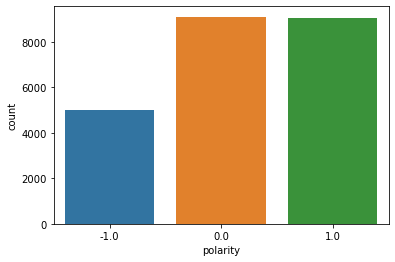

In [84]:
# plot the distribution of labels
import seaborn as sns
%matplotlib inline
sns.countplot(x='polarity', data=april_tweets)

In [9]:
# create joint dataframe for all months
final_df = pd.DataFrame()
for df in tweet_dfs:
    final_df = final_df.append(df)

In [10]:
final_df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_statuses_count,user_time_zone,user_urls,user_verified,text_clean,tokenized,clean_tokens,text_lemm,polarity,subjectivity
0,NaN,Fri Mar 20 00:28:41 +0000 2020,NaN,NaN,https://www.facebook.com/121074941432371/posts...,1,1240797371895820288,chrislhayes,NaN,4.207961e+06,...,387,NaN,NaN,False,iv vitamin has been successfully treatment fo...,"[iv, vitamin, has, been, successfully, treatme...","[iv, vitamin, successfully, treatment, corona,...",iv vitamin ha been successfully treatment for ...,1.0,0.662500
1,NaN,Fri Mar 20 04:27:16 +0000 2020,NaN,NaN,NaN,0,1240857417266728960,NaN,NaN,NaN,...,281064,NaN,NaN,False,this man piss could stop corona,"[this, man, piss, could, stop, corona]","[man, piss, could, stop, corona]",this man piss could stop corona,0.0,0.000000
2,NaN,Thu Mar 19 23:48:06 +0000 2020,NaN,NaN,NaN,0,1240787162225917955,NaN,NaN,NaN,...,4430,NaN,NaN,False,would really like to choke slam ms corona,"[would, really, like, to, choke, slam, ms, cor...","[would, really, like, choke, slam, ms, corona]",would really like to choke slam m corona,1.0,0.200000
3,NaN,Fri Mar 20 02:15:27 +0000 2020,NaN,NaN,NaN,0,1240824242343571458,NaN,NaN,NaN,...,42966,NaN,NaN,False,corona please we are tired we get it,"[corona, please, we, are, tired, we, get, it]","[corona, please, tired, get]",corona please we are tired we get it,-1.0,0.700000
4,NaN,Thu Mar 19 20:12:34 +0000 2020,NaN,NaN,NaN,0,1240732921570439172,NaN,NaN,NaN,...,31950,NaN,NaN,False,trump is so mentally decompensated that he ca...,"[trump, is, so, mentally, decompensated, that,...","[trump, mentally, decompensated, even, remembe...",trump is so mentally decompensated that he can...,-1.0,0.244444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,NaN,Fri Jul 31 19:29:19 +0000 2020,NaN,NaN,NaN,0,1289282008636706823,NaN,NaN,NaN,...,16869,NaN,NaN,False,this is what panic looks like we are the news...,"[this, is, what, panic, looks, like, we, are, ...","[panic, looks, like, news, baseless, us, consp...",this is what panic look like we are the news n...,1.0,0.454545
864,NaN,Fri Jul 31 15:41:50 +0000 2020,NaN,NaN,NaN,0,1289224763471208453,NaN,NaN,NaN,...,151507,NaN,NaN,False,sorry what,"[sorry, what]",[sorry],sorry what,-1.0,1.000000
865,NaN,Sat Aug 01 01:57:46 +0000 2020,NaN,NaN,https://twitter.com/karol/status/1289376402010...,0,1289379767997759489,NaN,NaN,NaN,...,216319,NaN,https://eidikosvaptistis.blogspot.com/,False,split so far interesting,"[split, so, far, interesting]","[split, far, interesting]",split so far interesting,1.0,0.750000
866,NaN,Fri Jul 31 21:42:21 +0000 2020,NaN,NaN,NaN,2,1289315487038365696,EstherMcVey1,1.289186e+18,7.614999e+17,...,6193,NaN,NaN,False,some might even think that this could be reas...,"[some, might, even, think, that, this, could, ...","[might, even, think, could, reason, stopping, ...",some might even think that this could be reaso...,0.0,0.625000


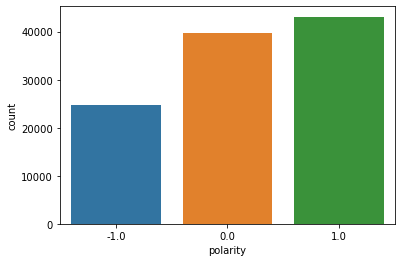

In [86]:
# plot the distribution of labels for the combined dataframe
fig = sns.countplot(x='polarity', data=final_df)
fig_copy = fig.get_figure()
fig_copy.savefig('polarity_distribution.png', bbox_inches = 'tight')

In [87]:
# get equal samples of labels to prepare balanced dataset
positives = final_df[final_df['polarity']==1.0].sample(20000)
negatives = final_df[final_df['polarity']==-1.0].sample(20000)
neutrals = final_df[final_df['polarity']==0.0].sample(20000)

In [89]:
# create balanced dataframe
polarity_dfs = [positives,negatives,neutrals]
balanced_df = pd.DataFrame()
for df in polarity_dfs:
    balanced_df = balanced_df.append(df)

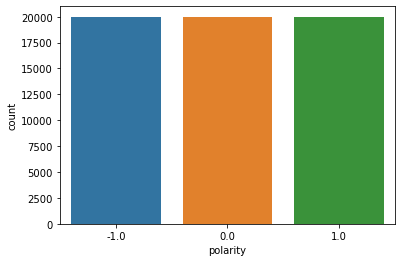

In [104]:
# plot label distribution for balanced dataset
fig = sns.countplot(x='polarity', data=balanced_df)
fig_copy = fig.get_figure()
fig_copy.savefig('balanced_polarity_distribution.png', bbox_inches = 'tight')

In [92]:
# shuffle the dataframe
balanced_df= balanced_df.sample(frac=1)

In [93]:
# vectorization of tweets
from sklearn.feature_extraction import stop_words
import nltk 
# nltk.download('wordnet')
# nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
# get tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

In [124]:
# create vectors (text features to numerical)
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(balanced_df['text_lemm'])

In [125]:
# create feature data and target data
X = vectors_tfidf
y = balanced_df['polarity']

In [126]:
# split training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
# import libraries used to calculate metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score

In [100]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB

# initialize
nb = MultinomialNB()

# fit
nb.fit(X_train, y_train)

# predict
nb_predictions = nb.predict(X_test)

# evaluate
print(confusion_matrix(y_test,nb_predictions))  
print(classification_report(y_test,nb_predictions))  
print("Test Accuracy= ",accuracy_score(y_test, nb_predictions))

[[3136  312  591]
 [ 732 2417  791]
 [ 574  291 3156]]
              precision    recall  f1-score   support

        -1.0       0.71      0.78      0.74      4039
         0.0       0.80      0.61      0.69      3940
         1.0       0.70      0.78      0.74      4021

    accuracy                           0.73     12000
   macro avg       0.73      0.72      0.72     12000
weighted avg       0.73      0.73      0.72     12000

Test Accuracy=  0.72575


In [105]:
# neural network
from sklearn.neural_network import MLPClassifier #6

# initialize
nn_model = MLPClassifier(alpha=1, max_iter=1000)

# fit
nn_model.fit(X_train,y_train)

# predict
model_predictions = nn_model.predict(X_test)

# evaluate
print(confusion_matrix(y_test,model_predictions))  
print(classification_report(y_test,model_predictions))  
print("Test Accuracy= ",accuracy_score(y_test, model_predictions))

[[2521 1035  483]
 [ 223 3489  228]
 [ 337 1041 2643]]
              precision    recall  f1-score   support

        -1.0       0.82      0.62      0.71      4039
         0.0       0.63      0.89      0.73      3940
         1.0       0.79      0.66      0.72      4021

    accuracy                           0.72     12000
   macro avg       0.74      0.72      0.72     12000
weighted avg       0.75      0.72      0.72     12000

Test Accuracy=  0.7210833333333333


In [101]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

# initialize
dt_model = DecisionTreeClassifier()

# fit
dt_model.fit(X_train,y_train)

# predict
dt_predictions = dt_model.predict(X_test)
# evaluate
print(confusion_matrix(y_test,dt_predictions))  
print(classification_report(y_test,dt_predictions))  
print("Test Accuracy= ",accuracy_score(y_test, dt_predictions))

[[3117  393  529]
 [ 235 3484  221]
 [ 448  440 3133]]
              precision    recall  f1-score   support

        -1.0       0.82      0.77      0.80      4039
         0.0       0.81      0.88      0.84      3940
         1.0       0.81      0.78      0.79      4021

    accuracy                           0.81     12000
   macro avg       0.81      0.81      0.81     12000
weighted avg       0.81      0.81      0.81     12000

Test Accuracy=  0.8111666666666667


In [102]:
# random forest 
from sklearn.ensemble import RandomForestClassifier

# initialize
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=0)  

# fit
rf_classifier.fit(X_train, y_train)

# predict
rf_predictions = rf_classifier.predict(X_test)

# evaluate
print(confusion_matrix(y_test,rf_predictions))  
print(classification_report(y_test,rf_predictions))  
print("Test Accuracy= ",accuracy_score(y_test, rf_predictions))

[[3136  510  393]
 [  36 3855   49]
 [ 255  597 3169]]
              precision    recall  f1-score   support

        -1.0       0.92      0.78      0.84      4039
         0.0       0.78      0.98      0.87      3940
         1.0       0.88      0.79      0.83      4021

    accuracy                           0.85     12000
   macro avg       0.86      0.85      0.85     12000
weighted avg       0.86      0.85      0.85     12000

Test Accuracy=  0.8466666666666667


In [108]:
# support vector machine
from sklearn.svm import SVC #1

# initialize
svm_classifier = SVC()

# fit
svm_classifier.fit(X_train, y_train)

# predict
svm_predictions = svm_classifier.predict(X_test)

# evaluate
print(confusion_matrix(y_test,svm_predictions))  
print(classification_report(y_test,svm_predictions))  
print("Test Accuracy= ",accuracy_score(y_test, svm_predictions))

[[3073  644  322]
 [  47 3864   29]
 [ 245  718 3058]]
              precision    recall  f1-score   support

        -1.0       0.91      0.76      0.83      4039
         0.0       0.74      0.98      0.84      3940
         1.0       0.90      0.76      0.82      4021

    accuracy                           0.83     12000
   macro avg       0.85      0.83      0.83     12000
weighted avg       0.85      0.83      0.83     12000

Test Accuracy=  0.8329166666666666


In [122]:
# choose best model from above, dump related pickle
import pickle
# save the model to disk

# naive_bayes = 'naive_bayes.sav'
# pickle.dump(nb, open(naive_bayes, 'wb'))

# neural_net = 'neural_net.sav'
# pickle.dump(nn_model, open(neural_net, 'wb'))

# decision_tree = 'decision_tree.sav'
# pickle.dump(dt_model, open(decision_tree, 'wb'))

random_forest = 'random_forest_balanced.sav'
pickle.dump(rf_classifier, open(random_forest, 'wb'))

# svm = 'svm.sav'
# pickle.dump(svm_classifier, open(svm, 'wb'))

# knn = 'knn.sav'
# pickle.dump(kn_classifier, open(knn, 'wb'))

# code to load model(next part)
# loaded_model = pickle.load(open('random_forest.sav', 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

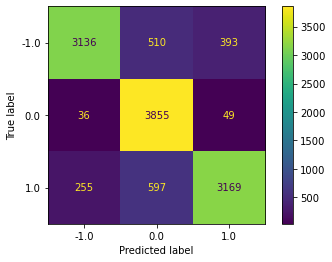

In [127]:
# plot confusion matrix for above models
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_classifier, X_test, y_test)

In [107]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
kn_classifier = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
kn_classifier.fit(X_train, y_train)

kn_predictions = kn_classifier.predict(X_test)
print(confusion_matrix(y_test,kn_predictions))  
print(classification_report(y_test,kn_predictions))  
print("Test Accuracy= ",accuracy_score(y_test, kn_predictions))

[[ 495 3533   11]
 [   7 3928    5]
 [   6 3796  219]]
              precision    recall  f1-score   support

        -1.0       0.97      0.12      0.22      4039
         0.0       0.35      1.00      0.52      3940
         1.0       0.93      0.05      0.10      4021

    accuracy                           0.39     12000
   macro avg       0.75      0.39      0.28     12000
weighted avg       0.75      0.39      0.28     12000

Test Accuracy=  0.3868333333333333


In [157]:
# apply topic modelling over vectors obtained above
from sklearn import decomposition
import collections
clf = decomposition.NMF(n_components = 10, random_state=1)
W1 = clf.fit_transform(vectors_tfidf)
H1 = clf.components_
vocab = np.array(vectorizer_tfidf.get_feature_names())
topics_frequency = collections.Counter(np.array(W1.argsort()[:,-1]))
topics_frequency = collections.OrderedDict(sorted(topics_frequency.items(),key= lambda kv: kv[1],reverse=True))
total_comments_count = sum(topics_frequency.values())

print('top ',10)
for k,v in topics_frequency.items():
    print('Topic {}:{}'.format(k+1, ", ".join([str(x) for x in vocab[(-H1[k]).argsort(axis=-1)[:10]]])))

top  10
Topic 2:corona, virus, fuck, shit, like, time, fight, india, china, want
Topic 1:covid, positive, amp, test, patient, testing, tested, say, ve, hospital
Topic 7:wa, just, day, said, got, lockdown, sorry, year, week, amp
Topic 6:pandemic, middle, job, global, health, time, amp, country, applying, need
Topic 10:ha, lockdown, world, country, government, time, state, really, life, day
Topic 3:case, new, death, day, total, number, reported, state, record, confirmed
Topic 8:mask, wear, like, don, social, distancing, wearing, face, outside, look
Topic 4:coronavirus, say, news, test, china, positive, vaccine, breaking, spread, world
Topic 9:trump, president, donald, american, called, rally, administration, say, chinese, think
Topic 5:people, black, died, called, think, dying, die, million, don, life


In [ ]:
# results based on imbalanced data
# # naive bayes
# [[1908  580 2462]
#  [  67 5306 2475]
#  [  86  569 8043]]
#               precision    recall  f1-score   support

#         -1.0       0.93      0.39      0.54      4950
#          0.0       0.82      0.68      0.74      7848
#          1.0       0.62      0.92      0.74      8698

#     accuracy                           0.71     21496
#    macro avg       0.79      0.66      0.68     21496
# weighted avg       0.76      0.71      0.70     21496

# Test Accuracy=  0.7097599553405285

# # neural network
# [[1325 2348 1277]
#  [  18 7197  633]
#  [  85 2241 6372]]
#               precision    recall  f1-score   support

#         -1.0       0.93      0.27      0.42      4950
#          0.0       0.61      0.92      0.73      7848
#          1.0       0.77      0.73      0.75      8698

#     accuracy                           0.69     21496
#    macro avg       0.77      0.64      0.63     21496
# weighted avg       0.75      0.69      0.67     21496

# Test Accuracy=  0.6928730926684035


# # decision tree
# [[3723  474  753]
#  [ 262 7055  531]
#  [ 723  900 7075]]
#               precision    recall  f1-score   support

#         -1.0       0.79      0.75      0.77      4950
#          0.0       0.84      0.90      0.87      7848
#          1.0       0.85      0.81      0.83      8698

#     accuracy                           0.83     21496
#    macro avg       0.82      0.82      0.82     21496
# weighted avg       0.83      0.83      0.83     21496

# Test Accuracy=  0.8305266096017864

# # random forest
# [[3714  608  628]
#  [  57 7691  100]
#  [ 323 1058 7317]]
#               precision    recall  f1-score   support

#         -1.0       0.91      0.75      0.82      4950
#          0.0       0.82      0.98      0.89      7848
#          1.0       0.91      0.84      0.87      8698

#     accuracy                           0.87     21496
#    macro avg       0.88      0.86      0.86     21496
# weighted avg       0.88      0.87      0.87     21496

# Test Accuracy=  0.8709527353926312

# # svm
# [[ 740 3314  896]
#  [   4 7630  214]
#  [  39 3805 4854]]
#               precision    recall  f1-score   support

#         -1.0       0.95      0.15      0.26      4950
#          0.0       0.52      0.97      0.68      7848
#          1.0       0.81      0.56      0.66      8698

#     accuracy                           0.62     21496
#    macro avg       0.76      0.56      0.53     21496
# weighted avg       0.74      0.62      0.57     21496

# Test Accuracy=  0.6151842203200596

# # knn
# [[ 727 4201   22]
#  [  19 7799   30]
#  [  12 7946  740]]
#               precision    recall  f1-score   support

#         -1.0       0.96      0.15      0.25      4950
#          0.0       0.39      0.99      0.56      7848
#          1.0       0.93      0.09      0.16      8698

#     accuracy                           0.43     21496
#    macro avg       0.76      0.41      0.32     21496
# weighted avg       0.74      0.43      0.33     21496

# Test Accuracy=  0.4310569408262002

### Roughwork - just testing different functionality

In [128]:
final_df

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_statuses_count,user_time_zone,user_urls,user_verified,text_clean,tokenized,clean_tokens,text_lemm,polarity,subjectivity
0,NaN,Fri Mar 20 00:28:41 +0000 2020,NaN,NaN,https://www.facebook.com/121074941432371/posts...,1,1240797371895820288,chrislhayes,NaN,4.207961e+06,...,387,NaN,NaN,False,iv vitamin has been successfully treatment fo...,"[iv, vitamin, has, been, successfully, treatme...","[iv, vitamin, successfully, treatment, corona,...",iv vitamin ha been successfully treatment for ...,1.0,0.662500
1,NaN,Fri Mar 20 04:27:16 +0000 2020,NaN,NaN,NaN,0,1240857417266728960,NaN,NaN,NaN,...,281064,NaN,NaN,False,this man piss could stop corona,"[this, man, piss, could, stop, corona]","[man, piss, could, stop, corona]",this man piss could stop corona,0.0,0.000000
2,NaN,Thu Mar 19 23:48:06 +0000 2020,NaN,NaN,NaN,0,1240787162225917955,NaN,NaN,NaN,...,4430,NaN,NaN,False,would really like to choke slam ms corona,"[would, really, like, to, choke, slam, ms, cor...","[would, really, like, choke, slam, ms, corona]",would really like to choke slam m corona,1.0,0.200000
3,NaN,Fri Mar 20 02:15:27 +0000 2020,NaN,NaN,NaN,0,1240824242343571458,NaN,NaN,NaN,...,42966,NaN,NaN,False,corona please we are tired we get it,"[corona, please, we, are, tired, we, get, it]","[corona, please, tired, get]",corona please we are tired we get it,-1.0,0.700000
4,NaN,Thu Mar 19 20:12:34 +0000 2020,NaN,NaN,NaN,0,1240732921570439172,NaN,NaN,NaN,...,31950,NaN,NaN,False,trump is so mentally decompensated that he ca...,"[trump, is, so, mentally, decompensated, that,...","[trump, mentally, decompensated, even, remembe...",trump is so mentally decompensated that he can...,-1.0,0.244444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863,NaN,Fri Jul 31 19:29:19 +0000 2020,NaN,NaN,NaN,0,1289282008636706823,NaN,NaN,NaN,...,16869,NaN,NaN,False,this is what panic looks like we are the news...,"[this, is, what, panic, looks, like, we, are, ...","[panic, looks, like, news, baseless, us, consp...",this is what panic look like we are the news n...,1.0,0.454545
864,NaN,Fri Jul 31 15:41:50 +0000 2020,NaN,NaN,NaN,0,1289224763471208453,NaN,NaN,NaN,...,151507,NaN,NaN,False,sorry what,"[sorry, what]",[sorry],sorry what,-1.0,1.000000
865,NaN,Sat Aug 01 01:57:46 +0000 2020,NaN,NaN,https://twitter.com/karol/status/1289376402010...,0,1289379767997759489,NaN,NaN,NaN,...,216319,NaN,https://eidikosvaptistis.blogspot.com/,False,split so far interesting,"[split, so, far, interesting]","[split, far, interesting]",split so far interesting,1.0,0.750000
866,NaN,Fri Jul 31 21:42:21 +0000 2020,NaN,NaN,NaN,2,1289315487038365696,EstherMcVey1,1.289186e+18,7.614999e+17,...,6193,NaN,NaN,False,some might even think that this could be reas...,"[some, might, even, think, that, this, could, ...","[might, even, think, could, reason, stopping, ...",some might even think that this could be reaso...,0.0,0.625000


In [148]:
covid_df = balanced_df[['created_at','text_lemm']]

In [149]:
covid_df['date_split'] = [str(x).split(' ') for x in covid_df['created_at']]

In [150]:
covid_df['date_split']

76     [Sun, Apr, 12, 03:06:33, +0000, 2020]
617    [Tue, May, 05, 13:46:28, +0000, 2020]
648    [Fri, Apr, 24, 01:27:13, +0000, 2020]
807    [Thu, Jun, 25, 21:15:43, +0000, 2020]
158    [Tue, Mar, 31, 13:20:36, +0000, 2020]
                       ...                  
28     [Sun, Jun, 28, 01:05:07, +0000, 2020]
344    [Wed, Jul, 29, 13:55:29, +0000, 2020]
495    [Tue, Jun, 23, 16:49:37, +0000, 2020]
178    [Wed, Jun, 24, 11:49:05, +0000, 2020]
492    [Sat, Jul, 11, 20:01:53, +0000, 2020]
Name: date_split, Length: 60000, dtype: object

In [151]:
covid_df['month'] = [x[1] for x in covid_df['date_split']]

In [152]:
covid_df['month']

76     Apr
617    May
648    Apr
807    Jun
158    Mar
      ... 
28     Jun
344    Jul
495    Jun
178    Jun
492    Jul
Name: month, Length: 60000, dtype: object

In [153]:
covid_df['polarity'] = [TextBlob(tweet).sentiment.polarity for tweet in covid_df['text_lemm']]
covid_df['subjectivity'] = [TextBlob(tweet).sentiment.subjectivity for tweet in covid_df['text_lemm']]

In [154]:
covid_df.groupby('month')["polarity"].mean()

month
Apr    0.011371
Aug   -0.031631
Jul    0.006621
Jun    0.000845
Mar   -0.003132
May    0.015927
Name: polarity, dtype: float64

In [160]:
covid_df = final_df[['created_at','polarity']]

In [179]:
covid_df['date_split'] = [str(x).split(' ') for x in covid_df['created_at']]
covid_df['month'] = [x[1] for x in covid_df['date_split']]
covid_polarity_1 = covid_df.groupby('month')["polarity"].mean()

In [162]:
covid_data = pd.read_csv("owid-covid-data.csv")

In [164]:
covid_data2 = covid_data[["date","total_cases","new_cases","total_deaths","new_deaths"]]

In [165]:
import missingno as msno

<AxesSubplot:>

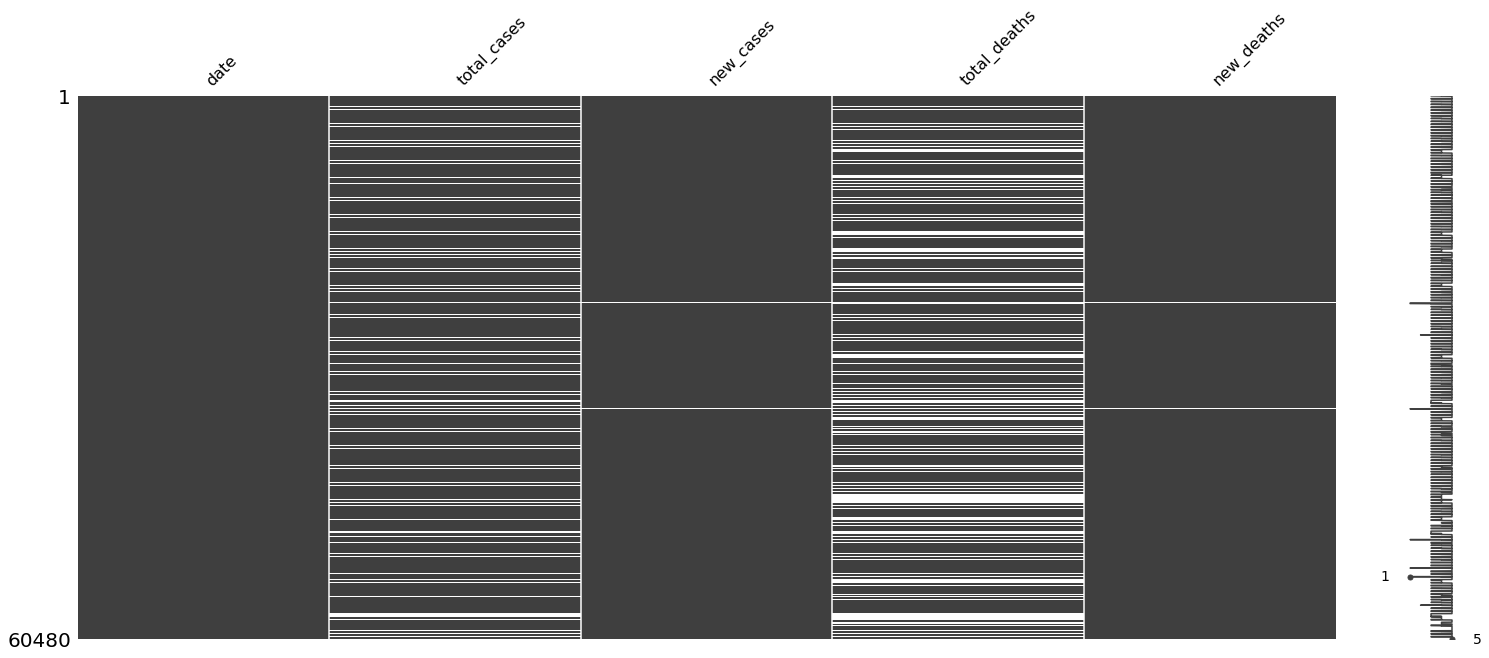

In [167]:
msno.matrix(covid_data2)

In [169]:
covid_data2["month"] = [str(x).split("-")[1] for x in covid_data2["date"]]

In [175]:
covid_cases = covid_data2.groupby('month')["new_cases"].sum()

In [176]:
covid_deaths = covid_data2.groupby('month')["new_deaths"].sum()

In [178]:
month
Aug    0.198651
Nov    0.199141
Oct    0.187410
Sep    0.174185

18744.0

In [188]:
covid_polarity_1

month
Apr    0.172609
Aug    0.006993
Jul    0.175810
Jun    0.155813
Mar    0.128497
May    0.194011
Name: polarity, dtype: float64

In [186]:
month_nos = ["03","04","05","06","07","08","09","10","11"]
months = ["Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]

In [194]:
covid_death_df = pd.DataFrame(covid_deaths)

In [192]:
covid_cases_df = pd.DataFrame(covid_cases)

In [193]:
covid_polarity1_df = pd.DataFrame(covid_polarity_1)

In [195]:
covid_death_df.to_csv("covid_deaths.csv")
covid_cases_df.to_csv("covid_cases.csv")
covid_polarity1_df.to_csv("covid_polarity_1.csv")

In [196]:
covid_polarity1_df

,polarity
month,
Apr,0.172609
Aug,0.006993
Jul,0.175810
Jun,0.155813
Mar,0.128497
May,0.194011
